In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
# Data Collection and Processing 
heart_data = pd.read_csv("heart_disease_data.csv")

In [33]:
# Display first 5 rows of the dataset
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [34]:
# Number of rows and columns in the dataset
print("Dataset Shape:", heart_data.shape)

Dataset Shape: (303, 14)


In [35]:
# Getting some info about the data
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [36]:
# Checking for missing values
print(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [37]:
# Statistical measures about the data
print(heart_data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [38]:
# Checking the distribution of Target Variable
print(heart_data['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_8876\1154150878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='coolwarm')


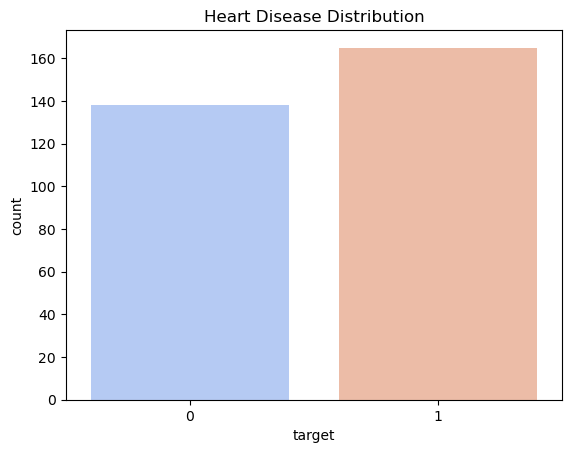

In [39]:
# Visualization - Target Variable Distribution
sns.countplot(x='target', data=heart_data, palette='coolwarm')
plt.title("Heart Disease Distribution")
plt.show()

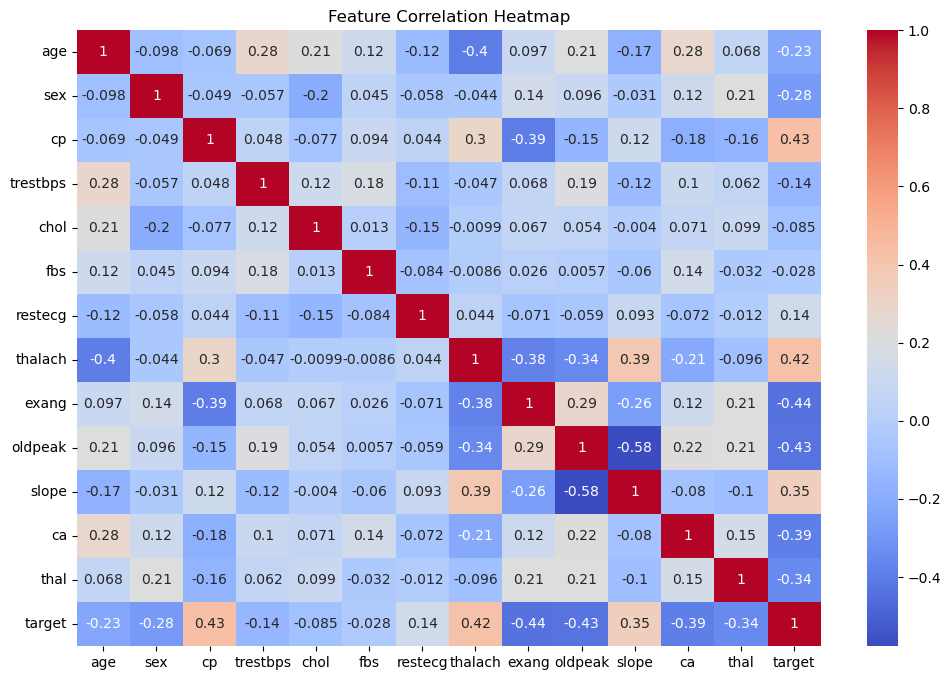

In [40]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
# Splitting the Features and Target
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [42]:
# Splitting the Data into Training & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
print("Training Shape:", X_train.shape, "Testing Shape:", X_test.shape)

Training Shape: (242, 13) Testing Shape: (61, 13)


In [43]:
# Model Training - Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# Model Evaluation - Accuracy Score
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print('Accuracy on Training data:', train_accuracy)

Accuracy on Training data: 0.8512396694214877


In [45]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Accuracy on Test data:', test_accuracy)

Accuracy on Test data: 0.819672131147541


In [46]:
# Building a Predictive System
input_data = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array for a single prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Making Prediction
prediction = model.predict(input_data_reshaped)
print("Prediction Output:", prediction)

if prediction[0] == 0:
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')

Prediction Output: [1]
The Person has Heart Disease


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
